# Functions

## What are functions?

Functions are reusable blocks of code that perform a specific task. They help streamline your code by allowing you to avoid repetition, improve readability, and make maintenance easier.

The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

In [1]:
# ----------- GIVEN TO STUDENTS ------------------
# Example 1: one-line docstring, no parameters, no return value
def greet():
    """Print a greeting message."""
    print("Hello, welcome to the class!")

greet()

Hello, welcome to the class!


In [2]:
# ----------- GIVEN TO STUDENTS ------------------
# Example 2: multi-line docstring, parameters, and return value
def calculate_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args:
        radius (float): The radius of the circle.
        
    Returns:
        float: The area of the circle, calculated as π * radius^2.
    """
    area = 3.14159 * radius ** 2
    return area

# ---------- WRITE THIS CODE DURING CLASS -------------
for radius in [1, 2, 3, 4, 5]:
    area = calculate_area(radius)
    print(f"The area of a circle with radius {radius} is {area:.2f}")

The area of a circle with radius 1 is 3.14
The area of a circle with radius 2 is 12.57
The area of a circle with radius 3 is 28.27
The area of a circle with radius 4 is 50.27
The area of a circle with radius 5 is 78.54


## Data loading and preparation

We'll practice creating functions using the same datasets from last week.

In [3]:
# ----------- GIVEN TO STUDENTS ------------------
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# --------------------------------------------------
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants = power_plants.drop(columns='Unnamed: 0') # Drop first column

# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)
states.columns = states.columns.str.lower()

# --------------------------------------------------
# Create geometry column for power plants
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

# Convert power plants DataFrame to GeoDataFrame
power_plants = gpd.GeoDataFrame(power_plants,      # Data
                                geometry=points,   # Specify geometry column
                                crs='EPSG:4269'    # Specify CRS
                                )


## Exercise: CA top power plant sources map

Last week we solved the followinge exercise to use a `for` with a `zip` to create subplots of the top 3 power plant sources in California.

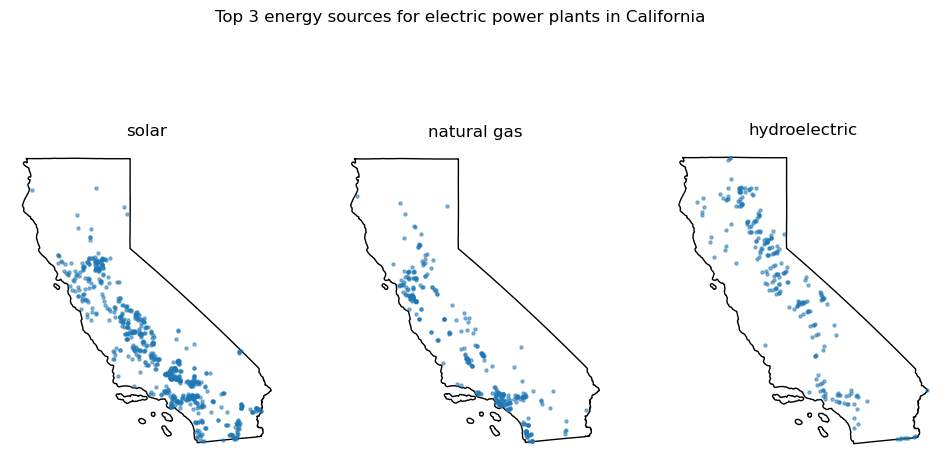

In [4]:
# ----------- GIVEN TO STUDENTS ------------------

# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = ['solar', 'natural gas', 'hydroelectric']

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Steps to create a function

In our previous code we "hard-coded" the top 3 power sources instead of obtaining them programmatically.

Let's make a function that does this for us! My general advice to break down this problem is:

- Step 1: solve the problem for a specific example
- Step 2: identify which parts of the code need to be generalized and update these parts
- Step 3: wrap this into a function
- Step 4: add additional parameters or assert statements if needed
- Step 5: add a docstring

### Step 1: solve the problem for a specific example

My recommendation is to first write code that solves the problem for a specific example (e.g., California), don't even think about the function yet. 

You can do this part mentally, but it can be useful to actually write down what steps you need to take:

1. Subset power plants for the given state
    
2. Count how many times each power source appears in that subset
    
3. Sort counts and select the top 3, this should be a list

Let's do this:

In [5]:
state_power_plants = power_plants[power_plants['state']=='California']
top_sources = (state_power_plants['primsource']
                            .value_counts()
                            .index[:3]
                            .tolist()
                            )
top_sources

['solar', 'natural gas', 'hydroelectric']

Great, now that we have code that works for a specific example, let's turn it into a function!

## Step 2: identify what parts of the code need to be generalized

In our case, we need to have the function work for any state, not just California. So we need to generalize the state name to be its own variable. So we replace 'California' with a parameter called `state` and re-run things to make sure it still works.

In [6]:
state = 'California'
state_power_plants = power_plants[power_plants['state']==state]
top_sources = (state_power_plants['primsource']
                            .value_counts()
                            .index[:3]
                            .tolist()
                            )
top_sources

['solar', 'natural gas', 'hydroelectric']

## Step 3: define the function
Now we can wrap the code into a function. 

Make sure everything is properly indented.

In [7]:
def top3_sources(state):
    state_power_plants = power_plants[power_plants['state']==state]
    top_sources = (state_power_plants['primsource']
                            .value_counts()
                            .index[:3]
                            .tolist()
                            )
    return top_sources

## Step 4: add docstrings, assert tests, and additional global parameters if needed

Finally, we can add a docstring to explain what the function does, its parameters, and its return values. We can also add additional global parameters if needed (e.g., the dataset to use).

In [8]:
def top3_sources(state, power_plants):
    """
    Find the top 3 electric primary sources of given state.
    
    Args:
        state (str): The US state we want information about.
        power_plants (gpd.GeoDataFrame): GeoDataFrame containing data 
        on power plants, with at least 'state' and 'primsource' columns.
    Returns:
        list: A list of the top 3 primary sources of the state within the power_plants data frame.
    """
    state_power_plants = power_plants[power_plants['state']==state]
    top_sources = (state_power_plants['primsource']
                                .value_counts()
                                .index[:3]
                                .tolist()
                                )
    return top_sources

In [9]:
print('Top 3 primary energy sources in Division 2 states:')
for state in ['New Jersey', 'New York', 'Pennsylvania']:
    print(state, ': ', top3_sources(state, power_plants))

Top 3 primary energy sources in Division 2 states:
New Jersey :  ['solar', 'natural gas', 'biomass']
New York :  ['solar', 'hydroelectric', 'natural gas']
Pennsylvania :  ['natural gas', 'solar', 'biomass']


## Example

Create a function that will produce a plot given a list of primary sources and a state name.

*The following steps we can work on overwriting the previous code.*

Step 1: We can start with the code we had before for California, we will use our functions for the top 3 power sources instead of hard-coding the ca_top_sources list.

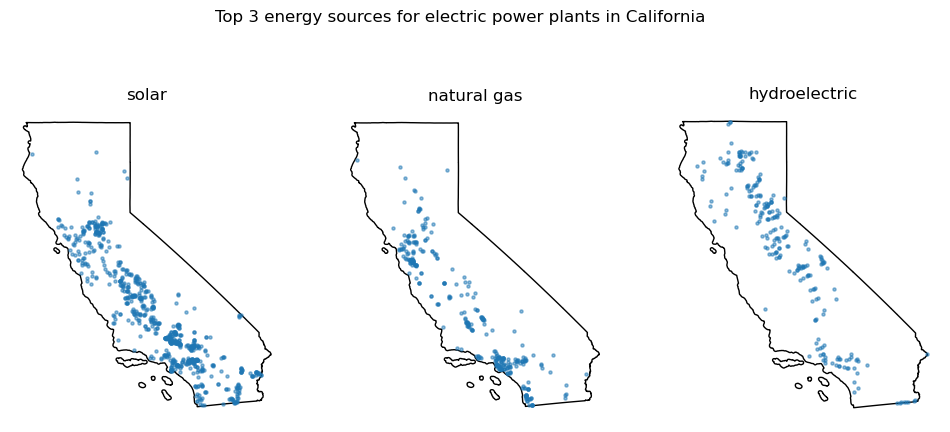

In [10]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == "California"]

# CA top 3 power sources were previously given
ca_top_sources = top3_sources('California', power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.subplots_adjust(top=1)  # Adjust height of subplots to fit suptitle
plt.show()

Step 2: what parts of the code need to be generalized?

Basically anything where we are using California specifically.

*First update all the 'California' strings to use a variable called `state` instead.*

*Then update all variables that have 'ca_' to be more general (e.g., `state_power_plants`, `state_boundary`).*

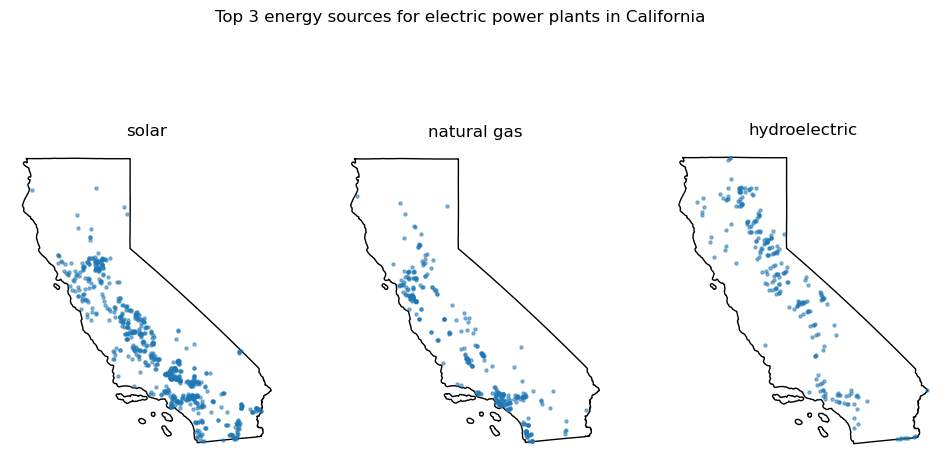

In [11]:
state = 'California'

# Select power plants and boundary
state_power_plants = power_plants[power_plants['state'] == state]
state_boundary = states[states['name'] == state]

# CA top 3 power sources were previously given
state_top_sources = top3_sources(state, power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    state_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = state_power_plants[state_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
plt.show()

Step 3: wrap this into a function. 

In [12]:
def plot_top3_power_sources(state, power_plants, states):

    # Select power plants and boundary
    state_power_plants = power_plants[power_plants['state'] == state]
    state_boundary = states[states['name'] == state]

    # CA top 3 power sources were previously given
    state_top_sources = top3_sources(state, power_plants)

    # Create subplots for each top source in a single figure
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
    for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources

        axis.set_title(source)
        axis.axis('off')

        state_boundary.plot(ax=axis,
                        color='none')
        
        # Subset power plants by source and plot
        source_subset = state_power_plants[state_power_plants['primsource'] == source]
        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
    plt.tight_layout()
    plt.show()

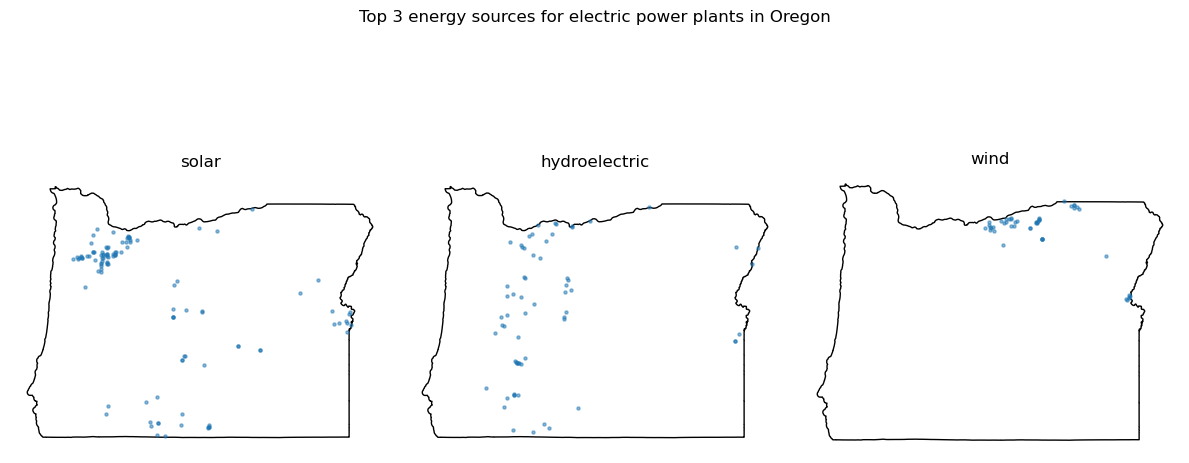

In [13]:
plot_top3_power_sources('Oregon', power_plants, states)

## Exercise 1

Create a function called `power_source_counts` that, given a power source, returns a Series with the counts of power plants by state that use that source.

Follow the steps:

1. solve the problem for a specific example (e.g., 'wind')
2. identify which parts of the code need to be generalized and update these parts
3. wrap this into a function
4. add additional parameters or assert statements if needed

In [14]:
# STEP 1
# top_states = power_plants[power_plants.primsource == 'nuclear'].state.value_counts()
# top_states

# STEP 2
# source = 'nuclear'
# top_states = power_plants[power_plants.primsource == source].state.value_counts()
# top_states

# STEP 3
def power_source_counts(source, power_plants):
    """
    Given a power source, returns a Series with the counts of power plants by state that use that source.
    
    Args:
        source (str): The primary source of energy to filter power plants by.
        power_plants (gpd.GeoDataFrame): GeoDataFrame containing data 
        on power plants, with at least 'state' and 'primsource' columns.
        
    Returns:
        pd.Series: A Series with the counts of power plants by state that use the given source.
    """
    top_states = power_plants[power_plants.primsource == source].state.value_counts()
    return top_states

power_source_counts('wind', power_plants)

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
New York           32
Idaho              32
New Mexico         29
Pennsylvania       26
Wyoming            25
South Dakota       23
Washington         23
Ohio               22
Massachusetts      20
Indiana            20
Maine              20
Rhode Island       19
Montana            19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
New Hampshire       5
Utah                5
Maryland            5
Vermont             5
Alaska              4
Tennessee           2
New Jersey          2
Puerto Rico         2
Delaware            1
Nevada              1
Virginia            1
North Carolina      1
Connecticut         1
Name: count, dtype: int64

In [15]:
power_plants.primsource.value_counts()

primsource
solar             5114
natural gas       1973
hydroelectric     1411
wind              1307
petroleum          901
biomass            634
batteries          218
coal               217
other               76
geothermal          67
nuclear             54
pumped storage      35
Name: count, dtype: int64

## Exercise 2

1. Recreate the following plot.

2. Make a function that produces this plot for any power source. 

In [16]:
def plot_top3_states_by_source(source, power_plants, states):
    
    top_states = power_source_counts(source, power_plants)

    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)

    for axis, state, power_plants_n in zip(ax, top_states.index, top_states):

        axis.set_title(f"{state}")
        axis.axis('off')
        
        state_boundary = states[states['name'] == state]
        state_boundary.plot(ax=axis,
                            color='none')

        state_power_plants = power_plants[power_plants['state'] == state]
        
        source_subset = state_power_plants[state_power_plants['primsource'] == source]
        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 U.S. states by number of {source}-powered electric plants",
                fontsize=16)
    plt.show()

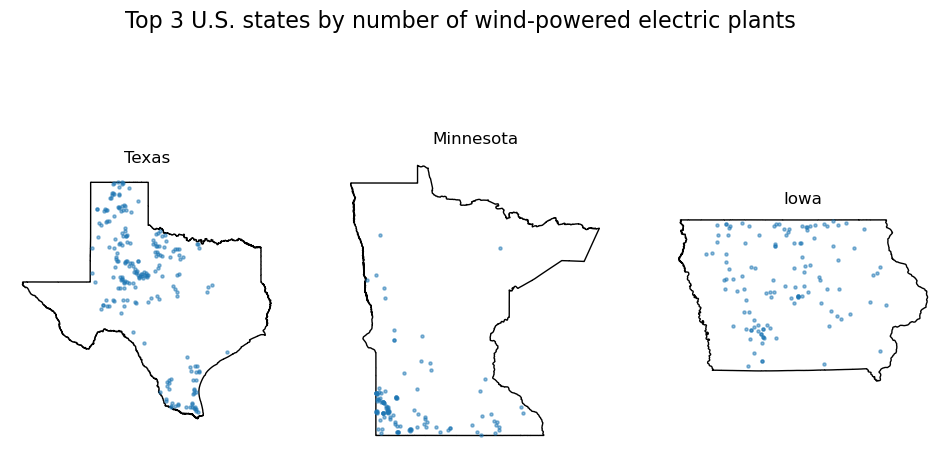

In [17]:
plot_top3_states_by_source('wind', power_plants, states)

## BONUS

Create a function that, for a given power source, produces a plot like this one. Many ways of doing it, a hint could be to zip three things together: the axes, the top 3 states, and the counts of power plants in those states. 

In [18]:
# Example of more than two zipped items

for a, b, c in zip([1,2,3], ['x','y','z'], [10,20,30]):
    print(a, b, c)

1 x 10
2 y 20
3 z 30


In [19]:
def plot_top3_states_by_source_ANNOTATED(source, power_plants, states):
    
    top_states = power_source_counts(source, power_plants)

    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)

    for axis, state, power_plants_n in zip(ax, top_states.index, top_states):

        axis.set_title(f"{state} ({power_plants_n} power plants)")
        axis.axis('off')
        
        state_boundary = states[states['name'] == state]
        state_boundary.plot(ax=axis,
                            color='none')

        state_power_plants = power_plants[power_plants['state'] == state]
        
        source_subset = state_power_plants[state_power_plants['primsource'] == source]
        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 U.S. states by number of {source}-powered electric plants",
                fontsize=16)
    plt.show()

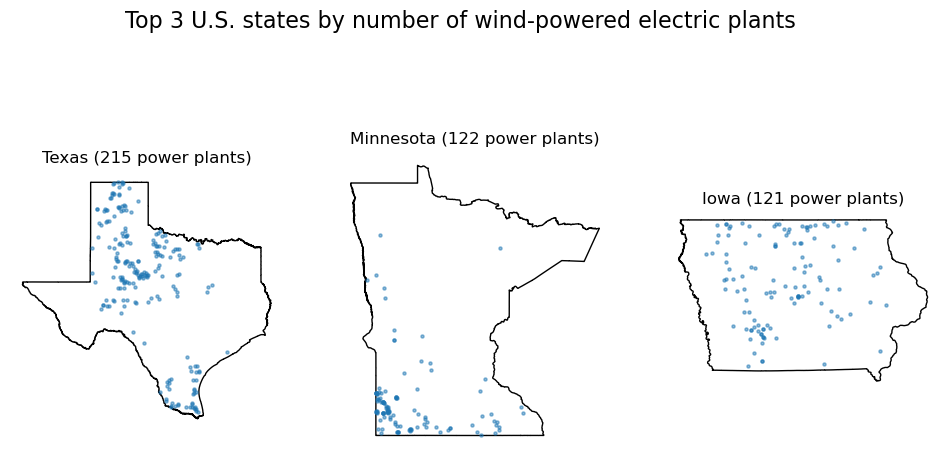

In [20]:
plot_top3_states_by_source_ANNOTATED('wind', power_plants, states)

TO DO:

- PREPARE STUDENT NOTEBOOK BASED ON THIS ONE
- UPDATE WEEK-BY-WEEK IN WEBSITE
- ADD EXERCISES TO NOTESn OR WEEK-BY-WEEK